In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import tensorflow_addons as tfa


# Load Dataset (APTOS 2019 or IDRiD dataset)
dataset_path = keras.utils.get_file(
    "aptos2019", "https://storage.googleapis.com/kaggle-data-sets/45341/743212/bundle/archive.zip",
    extract=True
)
image_size = (224, 224)
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    dataset_path, target_size=image_size, batch_size=batch_size, subset='training', class_mode='categorical'
)
val_generator = datagen.flow_from_directory(
    dataset_path, target_size=image_size, batch_size=batch_size, subset='validation', class_mode='categorical'
)

# CNN Model
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Transfer Learning (ResNet50)
def build_resnet_model():
    base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Vision Transformer (ViT)
def build_vit_model():
    vit_model = keras.Sequential([
        hub.KerasLayer("https://tfhub.dev/google/vit-base-patch16-224/1", trainable=False),
        layers.Dense(5, activation='softmax')
    ])
    vit_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return vit_model

# RNN Model (Using GRU for Image Sequence Processing)
def build_rnn_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.GRU(64, return_sequences=True),
        layers.GRU(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model (For Temporal Feature Extraction)
def build_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and Classification
models = {
    "CNN": build_cnn_model(),
    "ResNet": build_resnet_model(),
    "ViT": build_vit_model(),
    "RNN": build_rnn_model(),
    "LSTM": build_lstm_model()
}

for model_name, model in models.items():
    print(f"\nTraining {model_name} model...\n")
    model.fit(train_generator, validation_data=val_generator, epochs=10)
    model.save(f"{model_name}_diabetic_retinopathy_model.h5")
    
    # Evaluate Model
    loss, acc = model.evaluate(val_generator)
    print(f"Validation Accuracy for {model_name}: {acc:.2f}\n")
    
    # Classification on Test Data (Example)
    sample_images, sample_labels = next(val_generator)
    predictions = model.predict(sample_images)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(sample_labels, axis=1)
    
    for i in range(5):  # Show first 5 predictions
        plt.imshow(sample_images[i])
        plt.title(f"Actual: {actual_classes[i]}, Predicted: {predicted_classes[i]}")
        plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found

C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.18.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you wa

ModuleNotFoundError: No module named 'keras.src.engine'

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

# Load Dataset (APTOS 2019 or IDRiD dataset)
dataset_path = r"C:\Users\Sashwat Shukla\aptos2019"

image_size = (224, 224)
batch_size = 32

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    dataset_path, target_size=image_size, batch_size=batch_size, subset='training', class_mode='categorical'
)
val_generator = datagen.flow_from_directory(
    dataset_path, target_size=image_size, batch_size=batch_size, subset='validation', class_mode='categorical'
)

# CNN Model
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Transfer Learning (ResNet50)
def build_resnet_model():
    base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Vision Transformer (ViT)
# def build_vit_model():
#     vit_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
#     vit_layer = hub.KerasLayer(vit_url, trainable=False)

#     inputs = layers.Input(shape=(224, 224, 3))
#     normalized_inputs = layers.Rescaling(1./255)(inputs)
#     vit_outputs = vit_layer(normalized_inputs)
#     vit_output = tf.keras.layers.Lambda(lambda x: x['pooled_output'])(vit_outputs)

#     outputs = layers.Dense(5, activation='softmax')(vit_output)
#     model = keras.Model(inputs, outputs)
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# RNN Model (Using GRU for Image Sequence Processing)
def build_rnn_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.GRU(64, return_sequences=True),
        layers.GRU(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model (For Temporal Feature Extraction)
def build_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hybrid CNN-LSTM Model
def build_cnn_lstm_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Reshape((54*54, 64)),  # Adjusted based on actual pooling output
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hybrid RNN-LSTM Model
def build_rnn_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.GRU(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and Classification
models = {
    "CNN": build_cnn_model(),
    "ResNet": build_resnet_model(),
    # "ViT": build_vit_model(),  # Vision Transformer model commented out
    "RNN": build_rnn_model(),
    "LSTM": build_lstm_model(),
    "CNN_LSTM": build_cnn_lstm_model(),
    "RNN_LSTM": build_rnn_lstm_model()
}

best_model_name = None
best_accuracy = 0

for model_name, model in models.items():
    print(f"\nTraining {model_name} model...\n")
    model.fit(train_generator, validation_data=val_generator, epochs=10)
    model.save(f"{model_name}_diabetic_retinopathy_model.h5")

    # Evaluate Model
    loss, acc = model.evaluate(val_generator)
    print(f"Validation Accuracy for {model_name}: {acc:.2f}\n")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = model_name

    # Classification on Test Data (Example)
    sample_images, sample_labels = next(val_generator)
    predictions = model.predict(sample_images)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(sample_labels, axis=1)

    for i in range(5):
        plt.imshow(sample_images[i])
        plt.title(f"Actual: {actual_classes[i]}, Predicted: {predicted_classes[i]}")
        plt.show()

print(f"\nBest Performing Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")


Found 4473 images belonging to 2 classes.
Found 1117 images belonging to 2 classes.


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training CNN model...



C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 5)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found

Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training CNN model...



C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.5921 - loss: 1.9417 - val_accuracy: 0.7108 - val_loss: 0.8375
Epoch 2/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.7256 - loss: 0.7358 - val_accuracy: 0.6889 - val_loss: 0.8157


23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.6709 - loss: 0.8418
Validation Accuracy for CNN: 0.69

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


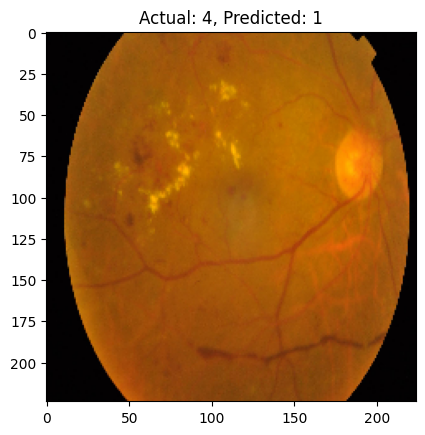

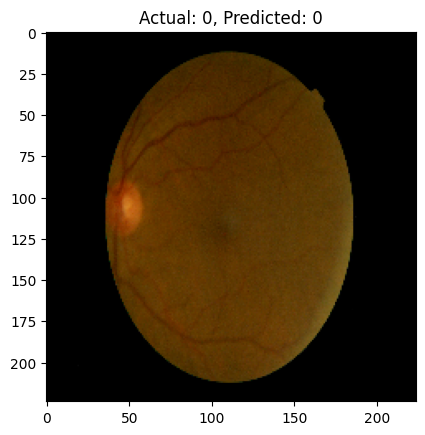


Training ResNet model...

Epoch 1/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 348s 4s/step - accuracy: 0.4798 - loss: 1.3311 - val_accuracy: 0.4925 - val_loss: 1.2692
Epoch 2/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.5091 - loss: 1.2482 - val_accuracy: 0.3697 - val_loss: 1.3351


23/23 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.3360 - loss: 1.3544
Validation Accuracy for ResNet: 0.37

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


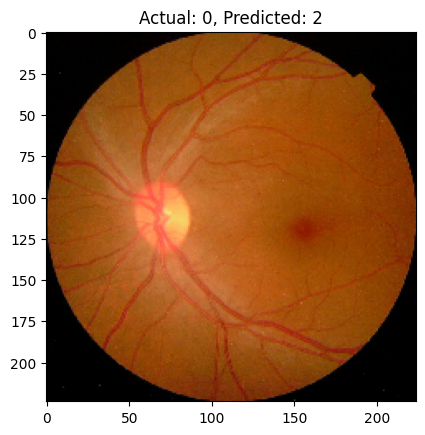

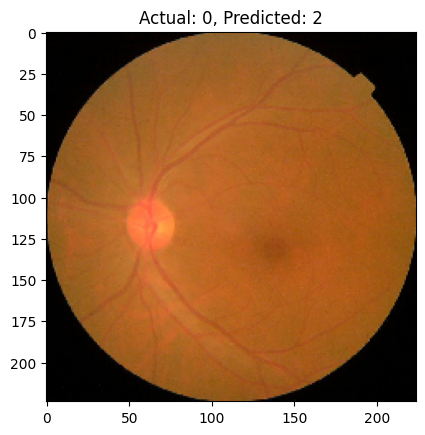


Best Performing Model: CNN with Accuracy: 0.69


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Dataset path
dataset_path = r"C:\Users\Sashwat Shukla\aptos2019"

image_size = (224, 224)
batch_size = 32

# Load CSV
df = pd.read_csv(os.path.join(dataset_path, "train.csv"))
df["filepath"] = df["id_code"].apply(lambda x: os.path.join(dataset_path, "train_images", x + ".png"))
df["label"] = df["diagnosis"].astype(str)  # Convert to string for categorical mode

# Split into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# Data generator
def dataframe_to_dataset(dataframe, image_size, batch_size, shuffle=True):
    datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    return datagen.flow_from_dataframe(
        dataframe,
        x_col="filepath",
        y_col="label",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=shuffle
    )

train_generator = dataframe_to_dataset(train_df, image_size, batch_size)
val_generator = dataframe_to_dataset(val_df, image_size, batch_size, shuffle=False)

# CNN Model
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Transfer Learning (ResNet50)
def build_resnet_model():
    base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RNN Model (Using GRU for Image Sequence Processing)
def build_rnn_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.GRU(64, return_sequences=True),
        layers.GRU(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model (For Temporal Feature Extraction)
def build_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hybrid CNN-LSTM Model
def build_cnn_lstm_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Reshape((54*54, 64)),  # Adjust based on pooling output shape
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hybrid RNN-LSTM Model
def build_rnn_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.GRU(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and Classification
models = {
    "CNN": build_cnn_model(),
    "ResNet": build_resnet_model(),
    # "ViT": build_vit_model(),  # Vision Transformer model commented out
    # The following models expect sequences of images, which your current generator does not provide:
    "RNN": build_rnn_model(),
    "LSTM": build_lstm_model(),
    "CNN_LSTM": build_cnn_lstm_model(),
    "RNN_LSTM": build_rnn_lstm_model()
}

best_model_name = None
best_accuracy = 0

for model_name, model in models.items():
    print(f"\nTraining {model_name} model...\n")
    model.fit(train_generator, validation_data=val_generator, epochs=2)
    model.save(f"{model_name}_diabetic_retinopathy_model.h5")

    # Evaluate Model
    loss, acc = model.evaluate(val_generator)
    print(f"Validation Accuracy for {model_name}: {acc:.2f}\n")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = model_name

    # Classification on Test Data (Example)
    sample_images, sample_labels = next(val_generator)
    predictions = model.predict(sample_images)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(sample_labels, axis=1)

    for i in range(5):
        plt.imshow(sample_images[i])
        plt.title(f"Actual: {actual_classes[i]}, Predicted: {predicted_classes[i]}")
        plt.show()

print(f"\nBest Performing Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
    self.io_loop.start()
  File "C:\Users\Sas

AttributeError: _ARRAY_API not found

Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training CNN model...



C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.5762 - loss: 2.7503 - val_accuracy: 0.6958 - val_loss: 0.7921
Epoch 2/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.7189 - loss: 0.7591 - val_accuracy: 0.6985 - val_loss: 0.7932


23/23 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.6688 - loss: 0.8254
Validation Accuracy for CNN: 0.70

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


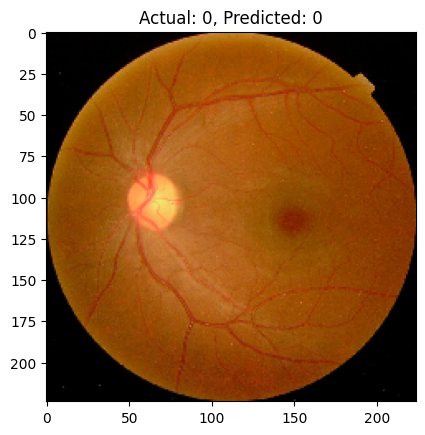

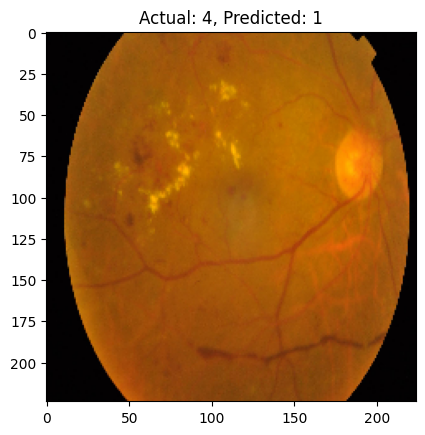

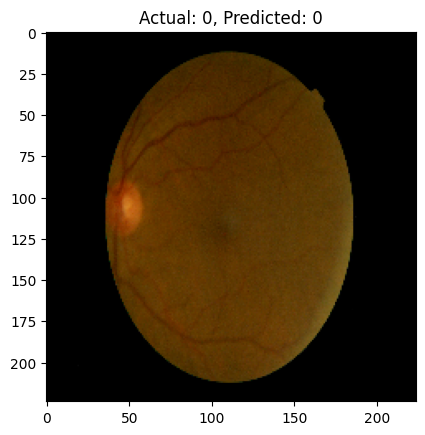


Training ResNet model...

Epoch 1/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 356s 4s/step - accuracy: 0.3885 - loss: 1.4766 - val_accuracy: 0.4925 - val_loss: 1.2836
Epoch 2/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.4899 - loss: 1.2852 - val_accuracy: 0.4925 - val_loss: 1.2644


23/23 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.5009 - loss: 1.2827
Validation Accuracy for ResNet: 0.49

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step



Training RNN model...

Epoch 1/2
91/91 ━━━━━━━━━━━━━━━━━━━━ 4614s 51s/step - accuracy: 0.4624 - loss: 1.2976 - val_accuracy: 0.4986 - val_loss: 1.2096
Epoch 2/2
91/91 ━━━━━━━━━━━━━━━━━━━━ 4430s 49s/step - accuracy: 0.4679 - loss: 1.2461 - val_accuracy: 0.4986 - val_loss: 1.2910


22/22 ━━━━━━━━━━━━━━━━━━━━ 539s 25s/step - accuracy: 0.5015 - loss: 1.3177
Validation Accuracy for RNN: 0.50



TypeError: 'SequenceDataGenerator' object is not an iterator

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Dataset path
dataset_path = r"C:\Users\Sashwat Shukla\aptos2019"

image_size = (224, 224)
batch_size = 32
sequence_length = 10  # For sequence models

# Load CSV
df = pd.read_csv(os.path.join(dataset_path, "train.csv"))
df["filepath"] = df["id_code"].apply(lambda x: os.path.join(dataset_path, "train_images", x + ".png"))
df["label"] = df["diagnosis"].astype(str)

# Split into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# Data generator for single images
def dataframe_to_dataset(dataframe, image_size, batch_size, shuffle=True):
    datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    return datagen.flow_from_dataframe(
        dataframe,
        x_col="filepath",
        y_col="label",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=shuffle
    )

# Data generator for sequence models
def dataframe_to_sequence_dataset(dataframe, image_size, sequence_length, batch_size, shuffle=True):
    class SequenceDataGenerator(keras.utils.Sequence):
        def __init__(self, dataframe, image_size, sequence_length, batch_size, shuffle=True):
            self.df = dataframe.reset_index(drop=True)
            self.image_size = image_size
            self.sequence_length = sequence_length
            self.batch_size = batch_size
            self.shuffle = shuffle
            self.on_epoch_end()

        def __len__(self):
            return len(self.df) // self.batch_size

        def __getitem__(self, index):
            batch_df = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size]
            X, y = [], []
            for _, row in batch_df.iterrows():
                imgs = []
                for _ in range(self.sequence_length):
                    img = keras.preprocessing.image.load_img(row['filepath'], target_size=self.image_size)
                    img_array = keras.preprocessing.image.img_to_array(img) / 255.
                    imgs.append(img_array)
                X.append(imgs)
                label = int(row['label'])
                y.append(tf.keras.utils.to_categorical(label, num_classes=5))
            return np.array(X), np.array(y)

        def on_epoch_end(self):
            if self.shuffle:
                self.df = self.df.sample(frac=1).reset_index(drop=True)

    return SequenceDataGenerator(dataframe, image_size, sequence_length, batch_size, shuffle)

train_generator = dataframe_to_dataset(train_df, image_size, batch_size)
val_generator = dataframe_to_dataset(val_df, image_size, batch_size, shuffle=False)

seq_train_generator = dataframe_to_sequence_dataset(train_df, image_size, sequence_length, batch_size)
seq_val_generator = dataframe_to_sequence_dataset(val_df, image_size, sequence_length, batch_size, shuffle=False)

# CNN Model
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Transfer Learning (ResNet50)
def build_resnet_model():
    base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RNN Model
def build_rnn_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.GRU(64, return_sequences=True),
        layers.GRU(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model
def build_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN-LSTM Model
def build_cnn_lstm_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Reshape((54*54, 64)),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RNN-LSTM Model
def build_rnn_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(10, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.GRU(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and Classification
models = {
    "CNN": (build_cnn_model(), train_generator, val_generator),
    "ResNet": (build_resnet_model(), train_generator, val_generator),
    "RNN": (build_rnn_model(), seq_train_generator, seq_val_generator),
    "LSTM": (build_lstm_model(), seq_train_generator, seq_val_generator),
    "CNN_LSTM": (build_cnn_lstm_model(), train_generator, val_generator),
    "RNN_LSTM": (build_rnn_lstm_model(), seq_train_generator, seq_val_generator)
}

best_model_name = None
best_accuracy = 0

for model_name, (model, train_gen, val_gen) in models.items():
    print(f"\nTraining {model_name} model...\n")
    model.fit(train_gen, validation_data=val_gen, epochs=2)
    model.save(f"{model_name}_diabetic_retinopathy_model.h5")

    # Evaluate Model
    loss, acc = model.evaluate(val_gen)
    print(f"Validation Accuracy for {model_name}: {acc:.2f}\n")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = model_name

    # Classification on Test Data (Example)
    sample_images, sample_labels = next(val_gen)
    predictions = model.predict(sample_images)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(sample_labels, axis=1)

    for i in range(5):
        plt.imshow(sample_images[i])
        plt.title(f"Actual: {actual_classes[i]}, Predicted: {predicted_classes[i]}")
        plt.show()

print(f"\nBest Performing Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")


Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training CNN model...



C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 316s 3s/step - accuracy: 0.5744 - loss: 1.9750 - val_accuracy: 0.7121 - val_loss: 0.8111
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.7235 - loss: 0.7327 - val_accuracy: 0.7217 - val_loss: 0.7791
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.7410 - loss: 0.6884 - val_accuracy: 0.7162 - val_loss: 0.8035
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.7615 - loss: 0.6521 - val_accuracy: 0.7312 - val_loss: 0.7554
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.7441 - loss: 0.6734 - val_accuracy: 0.7271 - val_loss: 0.7558
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.7528 - loss: 0.6709 - val_accuracy: 0.7285 - val_loss: 0.8047
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.7641 - loss: 0.6437 - val_accuracy: 0.7190 - val_loss: 0.7934
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.7566 - loss: 0.6494 - val_accuracy: 0.7203 - v

Validation Accuracy for CNN: 0.72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


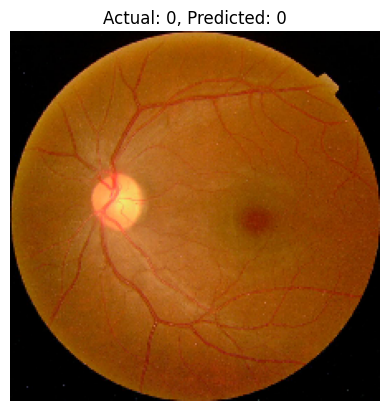

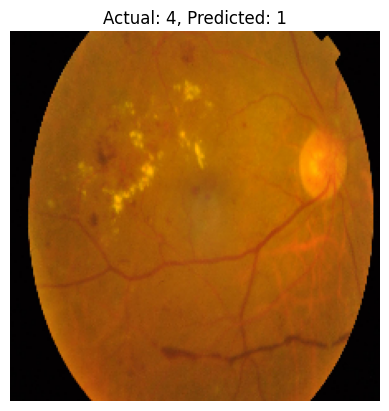


Training ResNet model...

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.4494 - loss: 1.3542 - val_accuracy: 0.4925 - val_loss: 1.2839
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.4760 - loss: 1.2797 - val_accuracy: 0.4925 - val_loss: 1.2620
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.4930 - loss: 1.2420 - val_accuracy: 0.4925 - val_loss: 1.2318
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.5003 - loss: 1.2350 - val_accuracy: 0.4925 - val_loss: 1.2140
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.5036 - loss: 1.2189 - val_accuracy: 0.4952 - val_loss: 1.2010
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.5149 - loss: 1.1998 - val_accuracy: 0.4952 - val_loss: 1.1856
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 338s 4s/step - accuracy: 0.5435 - loss: 1.1469 - val_accuracy: 0.5866 - val_loss: 1.1932
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11517s 127s/step - accuracy: 0.8124 - loss: 0.

Validation Accuracy for LSTM: 0.74
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


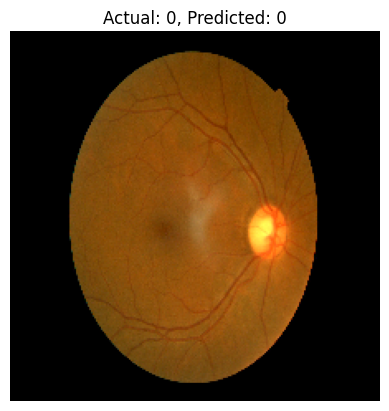

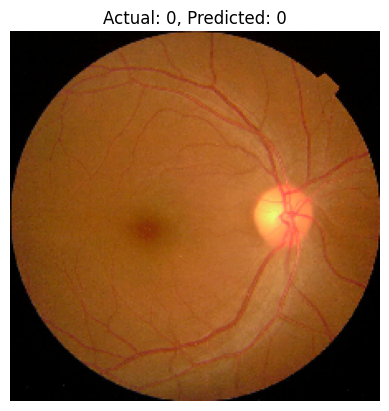

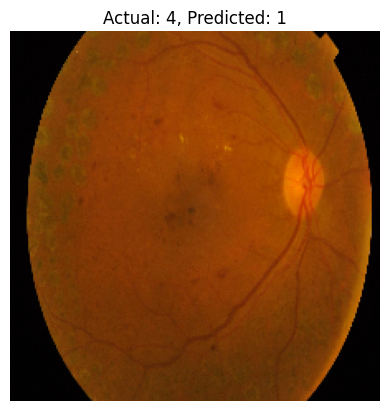


Training CNN+LSTM model...

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 325s 4s/step - accuracy: 0.6099 - loss: 1.0376 - val_accuracy: 0.6999 - val_loss: 0.8160
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step - accuracy: 0.7066 - loss: 0.7887 - val_accuracy: 0.7190 - val_loss: 0.7817
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.7156 - loss: 0.7662 - val_accuracy: 0.7121 - val_loss: 0.7877
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 305s 3s/step - accuracy: 0.7390 - loss: 0.7216 - val_accuracy: 0.7299 - val_loss: 0.7677
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.7346 - loss: 0.6910 - val_accuracy: 0.7244 - val_loss: 0.7531
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.7145 - loss: 0.7572 - val_accuracy: 0.7340 - val_loss: 0.7472
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.7236 - loss: 0.7187 - val_accuracy: 0.7299 - val_loss: 0.7597
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.7356 - loss: 0.70

Validation Accuracy for CNN+LSTM: 0.72
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


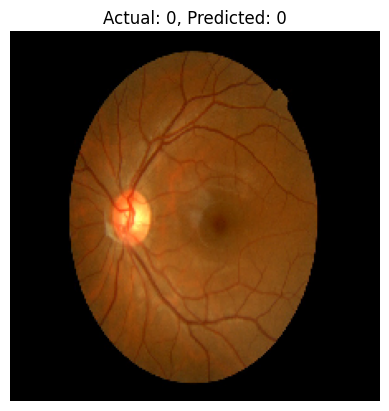

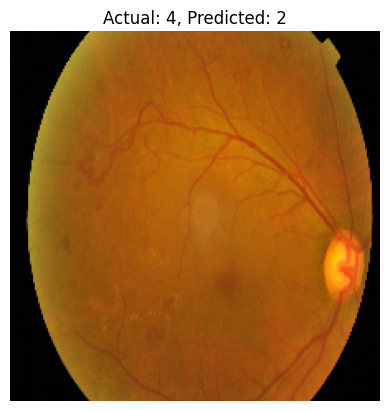


Training RNN+LSTM model...

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 298s 3s/step - accuracy: 0.4576 - loss: 1.3512 - val_accuracy: 0.4925 - val_loss: 1.2956
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 293s 3s/step - accuracy: 0.4804 - loss: 1.3198 - val_accuracy: 0.4925 - val_loss: 1.2951
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.4873 - loss: 1.3120 - val_accuracy: 0.4925 - val_loss: 1.2951
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 283s 3s/step - accuracy: 0.4974 - loss: 1.2759 - val_accuracy: 0.4925 - val_loss: 1.2953
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.5026 - loss: 1.2981 - val_accuracy: 0.4925 - val_loss: 1.2962
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.4906 - loss: 1.3072 - val_accuracy: 0.4925 - val_loss: 1.2962
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.4920 - loss: 1.2808 - val_accuracy: 0.4925 - val_loss: 1.2941
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.4952 - loss: 1.29

Validation Accuracy for RNN+LSTM: 0.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


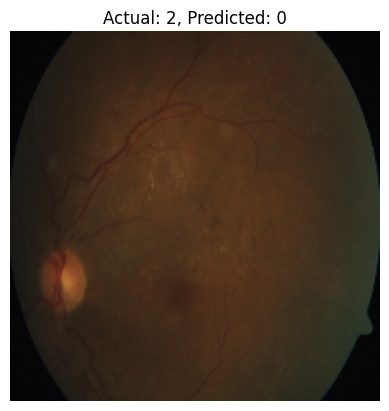


✅ Best Performing Model: LSTM with Accuracy: 0.74


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Dataset path
dataset_path = r"C:\Users\Sashwat Shukla\aptos2019"

image_size = (224, 224)
batch_size = 32
time_steps = 1  # For time-distributed models

# Load CSV
df = pd.read_csv(os.path.join(dataset_path, "train.csv"))
df["filepath"] = df["id_code"].apply(lambda x: os.path.join(dataset_path, "train_images", x + ".png"))
df["label"] = df["diagnosis"].astype(str)

# Split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# ImageDataGenerator
def dataframe_to_dataset(dataframe, image_size, batch_size, shuffle=True):
    datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    return datagen.flow_from_dataframe(
        dataframe,
        x_col="filepath",
        y_col="label",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=shuffle
    )

train_generator = dataframe_to_dataset(train_df, image_size, batch_size)
val_generator = dataframe_to_dataset(val_df, image_size, batch_size, shuffle=False)

# CNN Model
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ResNet Transfer Learning
def build_resnet_model():
    base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RNN Model using TimeDistributed
def build_rnn_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(16, (3,3), activation='relu'), input_shape=(time_steps, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.SimpleRNN(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model using TimeDistributed
def build_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(16, (3,3), activation='relu'), input_shape=(time_steps, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hybrid CNN + LSTM Model
def build_cnn_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(time_steps, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Conv2D(64, (3,3), activation='relu')),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RNN + LSTM hybrid model
def build_rnn_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(16, (3,3), activation='relu'), input_shape=(time_steps, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.SimpleRNN(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Helper: Convert 4D batch (N, H, W, C) → 5D batch (N, 1, H, W, C)
def make_time_distributed(generator):
    for batch_x, batch_y in generator:
        yield np.expand_dims(batch_x, axis=1), batch_y

# Define models
models = {
    "CNN": build_cnn_model(),
    "ResNet": build_resnet_model(),
    "RNN": build_rnn_model(),
    "LSTM": build_lstm_model(),
    "CNN+LSTM": build_cnn_lstm_model(),
    "RNN+LSTM": build_rnn_lstm_model()
}

best_model_name = None
best_accuracy = 0

# Training Loop
# Training Loop
for model_name, model in models.items():
    print(f"\nTraining {model_name} model...\n")

    if "RNN" in model_name or "LSTM" in model_name:
        train_gen = make_time_distributed(train_generator)
        val_gen = make_time_distributed(val_generator)
        steps_per_epoch = len(train_generator)
        validation_steps = len(val_generator)
        model.fit(train_gen, validation_data=val_gen, epochs=10, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
        
        # Evaluate RNN/LSTM model with time-distributed data
        loss, acc = model.evaluate(val_gen, steps=validation_steps)
    else:
        model.fit(train_generator, validation_data=val_generator, epochs=10)
        
        # Evaluate CNN/ResNet models directly
        loss, acc = model.evaluate(val_generator)

    model.save(f"{model_name}_diabetic_retinopathy_model.h5")
    print(f"Validation Accuracy for {model_name}: {acc:.2f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = model_name

    # Predictions
    sample_images, sample_labels = next(iter(val_generator))
    if "RNN" in model_name or "LSTM" in model_name:
        sample_images_seq = np.expand_dims(sample_images, axis=1)
        predictions = model.predict(sample_images_seq)
    else:
        predictions = model.predict(sample_images)

    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(sample_labels, axis=1)

    for i in range(3):
        if "RNN" in model_name or "LSTM" in model_name:
            plt.imshow(sample_images[i])
        else:
            plt.imshow(sample_images[i])
        plt.title(f"Actual: {actual_classes[i]}, Predicted: {predicted_classes[i]}")
        plt.axis('off')
        plt.show()

print(f"\n✅ Best Performing Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
import os

# Dataset path
dataset_path = r"C:\Users\Sashwat Shukla\aptos2019"

image_size = (224, 224)
batch_size = 32
time_steps = 1  # For time-distributed models

# Load CSV
df = pd.read_csv(os.path.join(dataset_path, "train.csv"))
df["filepath"] = df["id_code"].apply(lambda x: os.path.join(dataset_path, "train_images", x + ".png"))
df["label"] = df["diagnosis"].astype(str)

# Split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

# ImageDataGenerator
def dataframe_to_dataset(dataframe, image_size, batch_size, shuffle=True):
    datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    return datagen.flow_from_dataframe(
        dataframe,
        x_col="filepath",
        y_col="label",
        target_size=image_size,
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=shuffle
    )

train_generator = dataframe_to_dataset(train_df, image_size, batch_size)
val_generator = dataframe_to_dataset(val_df, image_size, batch_size, shuffle=False)

# CNN Model
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ResNet Transfer Learning
def build_resnet_model():
    base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RNN Model using TimeDistributed
def build_rnn_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(16, (3,3), activation='relu'), input_shape=(time_steps, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.SimpleRNN(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model using TimeDistributed
def build_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(16, (3,3), activation='relu'), input_shape=(time_steps, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Hybrid CNN + LSTM Model
def build_cnn_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu'), input_shape=(time_steps, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Conv2D(64, (3,3), activation='relu')),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RNN + LSTM hybrid model
def build_rnn_lstm_model():
    model = keras.Sequential([
        layers.TimeDistributed(layers.Conv2D(16, (3,3), activation='relu'), input_shape=(time_steps, 224, 224, 3)),
        layers.TimeDistributed(layers.MaxPooling2D()),
        layers.TimeDistributed(layers.Flatten()),
        layers.SimpleRNN(64, return_sequences=True),
        layers.LSTM(64),
        layers.Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Helper: Convert 4D batch (N, H, W, C) → 5D batch (N, 1, H, W, C)
def make_time_distributed(generator):
    for batch_x, batch_y in generator:
        yield np.expand_dims(batch_x, axis=1), batch_y

# Define models
models = {
    "CNN": build_cnn_model(),
    "ResNet": build_resnet_model(),
    "RNN": build_rnn_model(),
    "LSTM": build_lstm_model(),
    "CNN+LSTM": build_cnn_lstm_model(),
    "RNN+LSTM": build_rnn_lstm_model()
}

best_model_name = None
best_accuracy = 0
confusion_matrices = {}

# Training Loop
for model_name, model in models.items():
    print(f"\nTraining {model_name} model...\n")

    if "RNN" in model_name or "LSTM" in model_name:
        train_gen = make_time_distributed(train_generator)
        val_gen = make_time_distributed(val_generator)
        steps_per_epoch = len(train_generator)
        validation_steps = len(val_generator)
        model.fit(train_gen, validation_data=val_gen, epochs=20, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)
        sample_images, sample_labels = next(make_time_distributed(val_generator))
    else:
        model.fit(train_generator, validation_data=val_generator, epochs=20)
        sample_images, sample_labels = next(iter(val_generator))

    model.save(f"{model_name}_diabetic_retinopathy_model.h5")

    if "RNN" in model_name or "LSTM" in model_name:
        val_gen = make_time_distributed(val_generator)
        loss, acc = model.evaluate(val_gen, steps=len(val_generator))
    else:
        loss, acc = model.evaluate(val_generator)

    print(f"Validation Accuracy for {model_name}: {acc:.2f}")

    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = model_name

    if "RNN" in model_name or "LSTM" in model_name:
        predictions = model.predict(sample_images)  # sample_images is already 5D
    else:
        predictions = model.predict(sample_images)

    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(sample_labels, axis=1)

    cm = confusion_matrix(actual_classes, predicted_classes)
    confusion_matrices[model_name] = cm

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    for i in range(min(3, len(predicted_classes))):
        if "RNN" in model_name or "LSTM" in model_name:
            image = sample_images[i, 0]  # shape: (224, 224, 3)
        else:
            image = sample_images[i]

        plt.imshow(image)
        plt.title(f"Actual: {actual_classes[i]}, Predicted: {predicted_classes[i]}")
        plt.axis('off')
        plt.show()

# Accuracy Comparison Graph
plt.figure(figsize=(10,6))
model_names = list(confusion_matrices.keys())
accuracies = [np.trace(cm) / np.sum(cm) for cm in confusion_matrices.values()]

sns.barplot(x=model_names, y=accuracies)
plt.ylabel("Validation Accuracy")
plt.title("Model Comparison Based on Accuracy")
plt.xticks(rotation=45)
plt.show()

print(f"\n✅ Best Performing Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")


Found 2929 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training CNN model...



C:\Users\Sashwat Shukla\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 337s 4s/step - accuracy: 0.6360 - loss: 1.5191 - val_accuracy: 0.7162 - val_loss: 0.7871
Epoch 2/20
27/92 ━━━━━━━━━━━━━━━━━━━━ 3:11 3s/step - accuracy: 0.6973 - loss: 0.7866